In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [23]:
from sklearn.datasets import load_diabetes

In [24]:
dataset= load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [25]:
print(dataset.DESCR)  # Description of the dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [26]:
X=pd.DataFrame(dataset.data, columns=dataset.feature_names) 
y=pd.DataFrame(dataset.target, columns=['target'])


<Axes: >

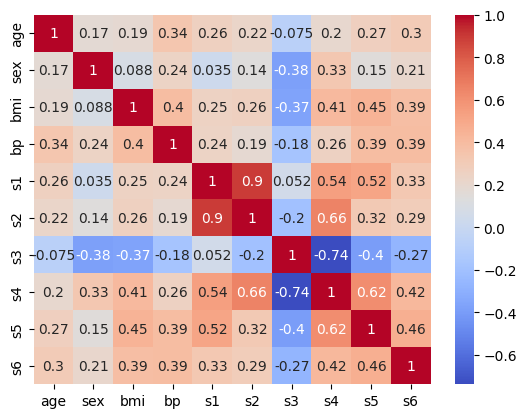

In [30]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4976.797752808989
R^2 Score: 0.060653981041140725


### Hyperparameter Tuning

In [31]:
params={
    'max_depth': [2, 4, 6, 8, 10, None],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=params,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best= mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')


Best Mean Squared Error: 3830.490578636021
Best R^2 Score: 0.2770138039725839


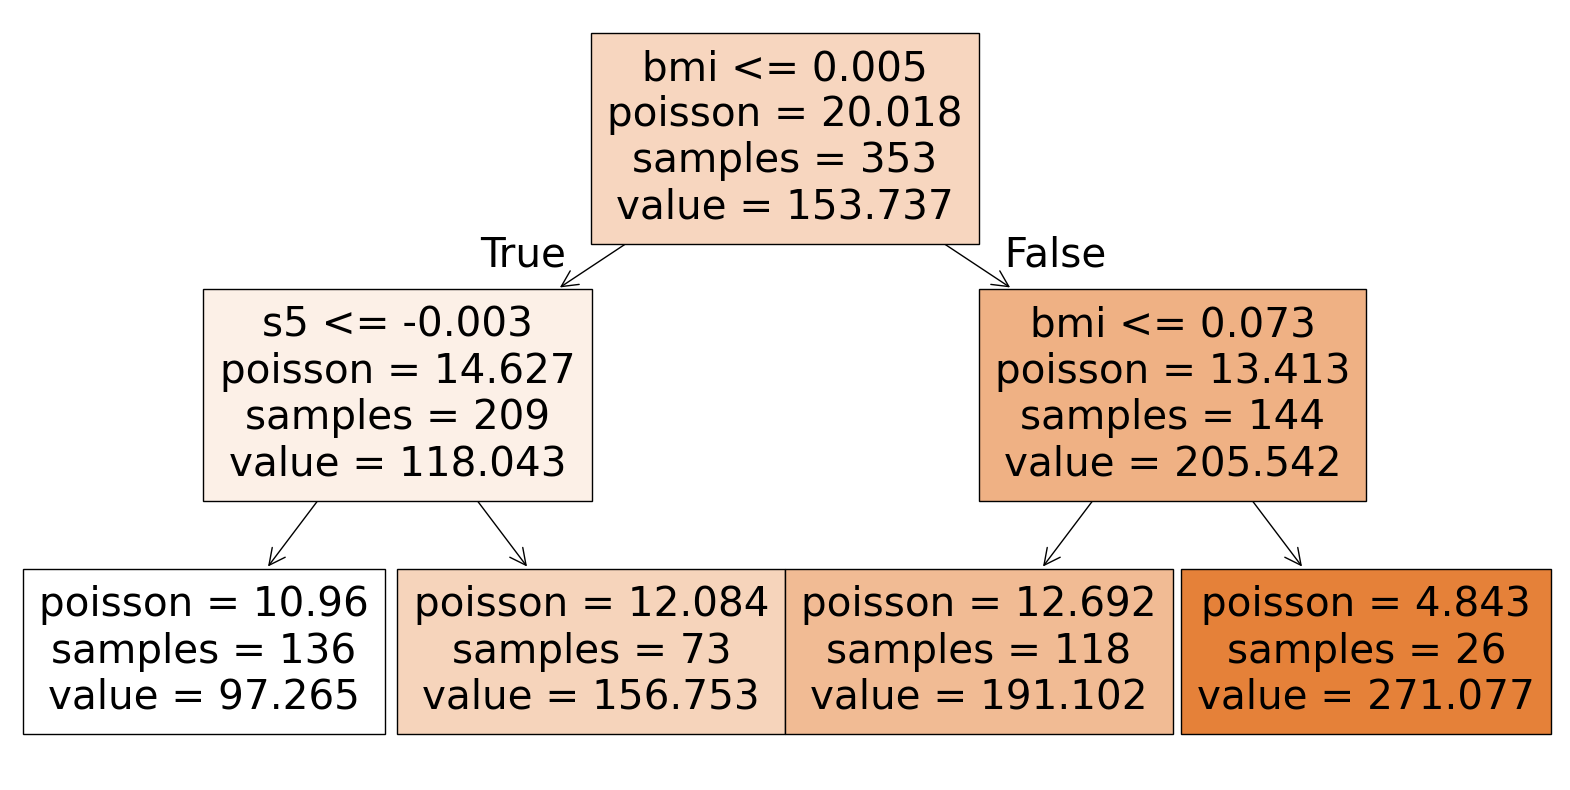

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()